In [1]:
import os, glob
import numpy as np

In [3]:
path = './Meta/'
full_names = os.listdir(path)
labels = sorted([each.split('.')[0] for each in full_names])
categories = labels
categories

['0',
 '1',
 '10',
 '100',
 '101',
 '102',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '3',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '4',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '5',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '6',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '7',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '8',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '9',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 '96',
 '97',
 '98',
 '99']

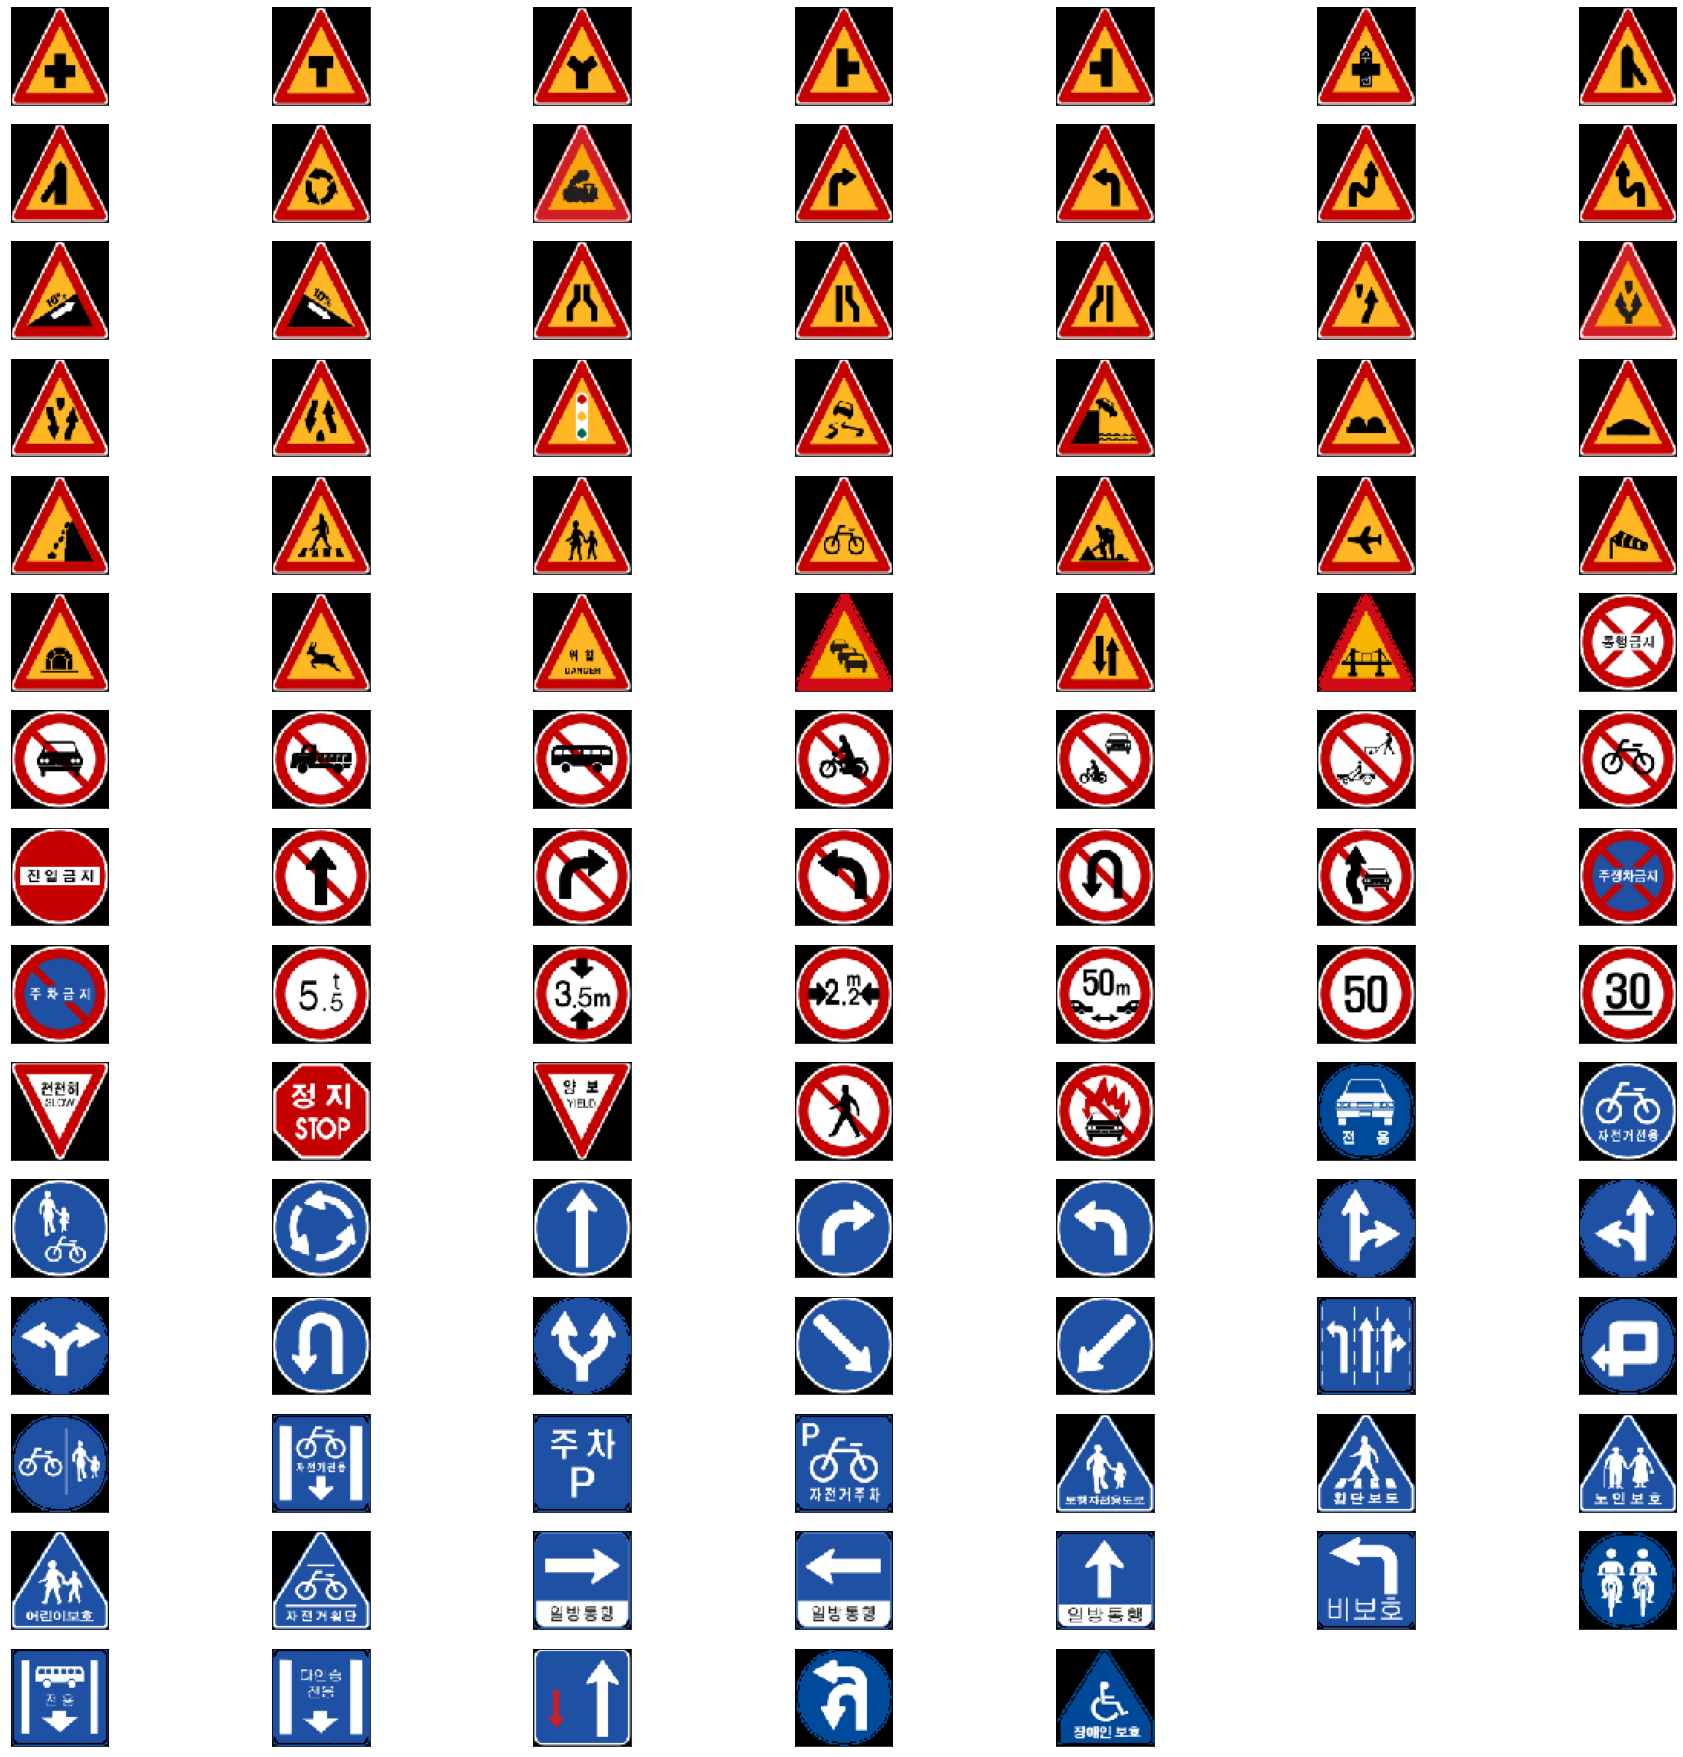

In [4]:
import pathlib
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
meta_dir = pathlib.Path('./Meta')
plt.figure(figsize = (32, 32))
index = 0

for i in range(len(labels)):
    plt.subplot(15, 7, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    sign = list(meta_dir.glob(f'{i}.*'))[0]
    img = load_img(sign, target_size=(64, 64))
    plt.imshow(img)
    
plt.show()

In [5]:
classes = {
    0:"+자형 교차로",
    1:"T자형 교차로",
    2:"Y자형 교차로",
    3:"ㅏ자형 교차로",
    4:"ㅓ자형 교차로",
    5:"우선 도로",
    6:"우합류 도로",
    7:"좌합류 도로",
    8:"회전형 교차로",
    9:"철길 건널목",
    10:"우로 굽은 도로",
    11:"좌로 굽은 도로",
    12:"우좌로 이중 굽은 도로",
    13:"좌우로 이중 굽은 도로",
    14:"오르막 경사",
    15:"내리막 경사",
    16:"도로 폭이 좁아짐",
    17:"우측 차로 없어짐",
    18:"좌측 차로 없어짐",
    19:"우측방 통행",
    20:"양측방 통행",
    21:"중앙 분리대 시작",
    22:"중앙 분리대 끝남",
    23:"신호기",
    24:"미끄러운 도로",
    25:"강변 도로",
    26:"노면 고르지 못함",
    27:"과속 방지턱",
    28:"낙석 도로",
    29:"횡단 보도(주의)",
    30:"어린이 보호(주의)",
    31:"자전거(주의)",
    32:"도로 공사중",
    33:"비행기",
    34:"횡풍",
    35:"터널",
    36:"야생 동물 보호",
    37:"위험",
    38:"상습 정체 구간",
    39:"2방향 통행",
    40:"교량",
    41:"통행 금지",
    42:"자동차 통행 금지",
    43:"화물차 통행 금지",
    44:"승합차 통행 금지",
    45:"이륜차 및 원동기장치자전거 통행 금지",
    46:"자동차, 이륜차 및 원동기장치자전거 통행 금지",
    47:"경운기, 트랙터 및 손수레 통행 금지",
    48:"자전거 통행 금지",
    49:"진입 금지",
    50:"직진 금지",
    51:"우회전 금지",
    52:"좌회전 금지",
    53:"유턴 금지",
    54:"앞지르기 금지",
    55:"주정차 금지",
    56:"주차 금지",
    57:"차 중량 제한",
    58:"차 높이 제한",
    59:"차 폭 제한",
    60:"차간 거리 확보",
    61:"최고 속도 제한",
    62:"최저 속도 제한",
    63:"서행",
    64:"일시 정지",
    65:"양보",
    66:"보행자 보행 금지",
    67:"위험물적재차량 통행 금지",
    68:"자동차 전용 도로",
    69:"자전거 전용 도로",
    70:"자전거 및 보행자 겸용 도로",
    71:"회전 교차로",
    72:"직진",
    73:"우회전",
    74:"좌회전",
    75:"직진 및 우회전",
    76:"직진 및 좌회전",
    77:"좌우회전",
    78:"유턴",
    79:"양측방 통행",
    80:"우측면 통행",
    81:"좌측면 통행",
    82:"진행 방향별 통행 구분",
    83:"우회로",
    84:"자전거 및 보행자 통행구분",
    85:"자전거 전용 차로",
    86:"주차장",
    87:"자전거 주차장",
    88:"보행자 전용 도로",
    89:"횡단 보도",
    90:"노인 보호",
    91:"어린이 보호",
    92:"자전거 횡단 도",
    93:"일방 통행(우)",
    94:"일방 통행(좌)",
    95:"일방 통행(직)",
    96:"비보호 좌회전",
    97:"자전거 나란히",
    98:"버스 전용 차로",
    99:"다인승 차량 전용 차로",
    100:"통행 우선",
    101:"좌회전 및 유턴",
    102:"장애인 보호"
}

In [6]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/HYGPRM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)


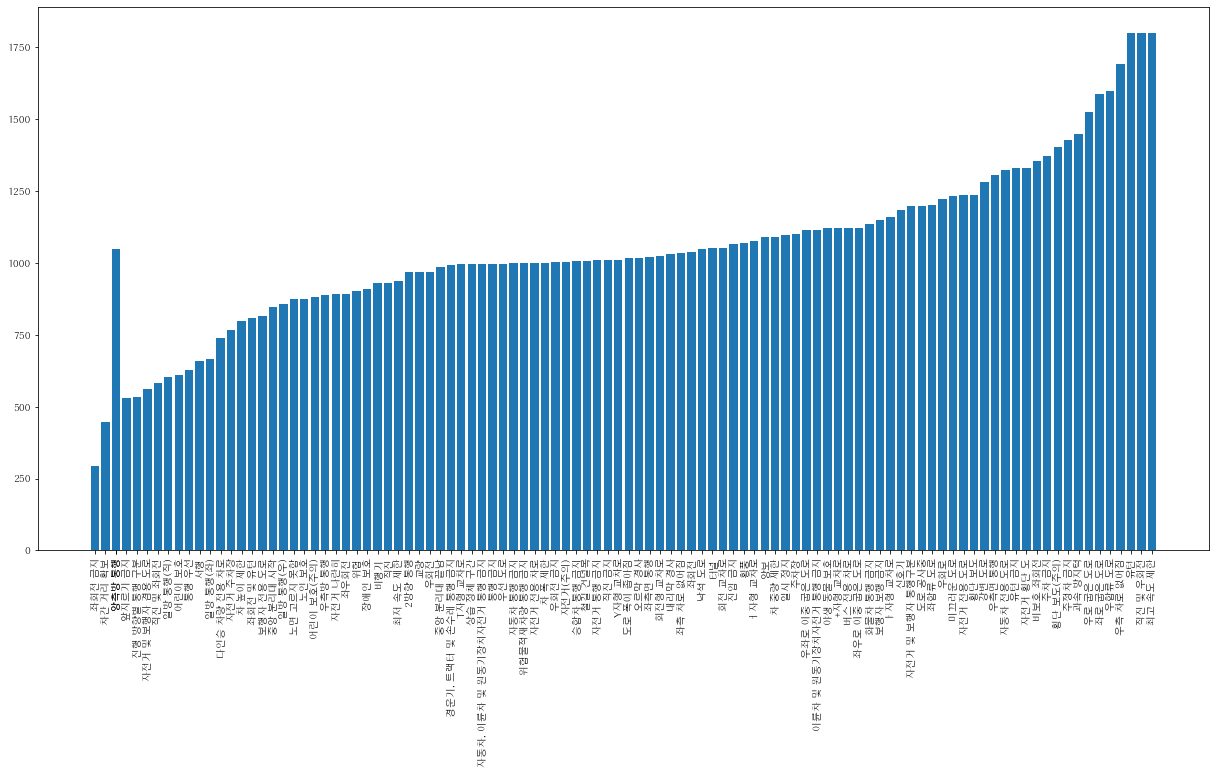

In [8]:
folders = os.listdir('./dataset')
train_path = pathlib.Path('./dataset')
train_num = []
class_num = []

for folder in folders:
    train_files = os.listdir(str(train_path) + '/' + folder)
    train_num.append(len(train_files))
    class_num.append(classes[int(folder)])

zipped_lists = zip(train_num, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_num, class_num = [list(tuple) for tuple in tuples]

plt.figure(figsize = (21, 10))
plt.bar(class_num, train_num)
plt.xticks(class_num, rotation = 'vertical')
plt.show()

In [7]:
# example of brighting image augmentation
from tqdm.notebook import tqdm
from numpy import expand_dims
import tensorflow
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import cv2


# range_ = tqdm(labels)
# for dir_num in range_:
#     # 이미지 로드
#     img = load_img("./Meta/{}.png".format(dir_num))
#     # Numpy array 로 변환
#     data = img_to_array(img)
#     # expand dimension to one sample
#     samples = expand_dims(data, 0)
#     # image data augmentation generator 생성
#     datagen = ImageDataGenerator(
#         brightness_range=[0.2, 2.0],
#         zoom_range=[0.3, 1],
#         rotation_range=20,
#         height_shift_range=0.2,
#         width_shift_range=0.2)
#     # prepare iterator
#     it = datagen.flow(samples, batch_size=1)
#     os.mkdir('./traffic_image/{}'.format(dir_num))

#     for i in range(1000):
#         batch = it.next()
#         image = batch[0].astype("uint8")
#         # rgb 변환
#         b, g, r = cv2.split(image)
#         img_astro3_rgb = cv2.merge([r, g, b])
#         cv2.imwrite("./traffic_image/{}/{}_{}.png".format(dir_num,
#                                                           dir_num, i), img_astro3_rgb)

  0%|          | 0/103 [00:00<?, ?it/s]

In [12]:
from PIL import Image
import os
import glob
import numpy as np
from sklearn.model_selection import train_test_split

caltech_dir = "./dataset/"
categories = labels
nb_classes = len(labels)

image_w = 64
image_h = 64

X = []
y = []

for idx, cat in enumerate(categories):

    #   one-hot 돌리기.
    label = [0 for i in range(nb_classes)]
    label[idx] = 1

    image_dir = caltech_dir + "/" + str(cat)
    files = glob.glob(image_dir+"/*.*")
    print(cat, " 파일 길이 : ", len(files))
    # 이미지 파일을 64 x 64 로 줄이고, 벡터화 시켜 X에 저장, one-hot-encoding된 라벨도 저장
    for i, f in enumerate(files):
        img = Image.open(f)
        img = img.convert("RGB")
        img = img.resize((image_w, image_h))
        data = np.asarray(img)

        X.append(data)
        y.append(label)

X = np.array(X)
y = np.array(y)

0  파일 길이 :  1121
1  파일 길이 :  996
10  파일 길이 :  1526
100  파일 길이 :  628
101  파일 길이 :  810
102  파일 길이 :  910
11  파일 길이 :  1589
12  파일 길이 :  1114
13  파일 길이 :  1122
14  파일 길이 :  1017
15  파일 길이 :  1030
16  파일 길이 :  1017
17  파일 길이 :  1691
18  파일 길이 :  1035
19  파일 길이 :  890
2  파일 길이 :  1011
20  파일 길이 :  1049
21  파일 길이 :  846
22  파일 길이 :  987
23  파일 길이 :  1185
24  파일 길이 :  1233
25  파일 길이 :  1280
26  파일 길이 :  876
27  파일 길이 :  1447
28  파일 길이 :  1049
29  파일 길이 :  1402
3  파일 길이 :  1160
30  파일 길이 :  883
31  파일 길이 :  1002
32  파일 길이 :  1198
33  파일 길이 :  931
34  파일 길이 :  1070
35  파일 길이 :  1052
36  파일 길이 :  1120
37  파일 길이 :  902
38  파일 길이 :  996
39  파일 길이 :  969
4  파일 길이 :  1076
40  파일 길이 :  970
41  파일 길이 :  997
42  파일 길이 :  999
43  파일 길이 :  1136
44  파일 길이 :  1006
45  파일 길이 :  1116
46  파일 길이 :  996
47  파일 길이 :  994
48  파일 길이 :  1009
49  파일 길이 :  1065
5  파일 길이 :  998
50  파일 길이 :  1010
51  파일 길이 :  1002
52  파일 길이 :  292
53  파일 길이 :  1332
54  파일 길이 :  531
55  파일 길이 :  1427
56  파일 길이 :  1373
57  파일 길이 :  109

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
xy = (X_train, X_test, y_train, y_test)

In [14]:

X_train.shape

(80472, 64, 64, 3)

In [15]:
y_train_test = y_train.reshape(-1,1)
y_train_test.shape

(8288616, 1)

In [16]:
y_train.shape

(80472, 103)

In [17]:
import pickle 
pickle.dump(xy, open("./model/traffic_model_2_4.npy", 'wb'), protocol=4)

In [18]:
X_train, X_test, y_train, y_test = np.load('./model/traffic_model_2_4.npy',allow_pickle=True)

In [19]:
X_train.shape

(80472, 64, 64, 3)

In [20]:
y_train.shape

(80472, 103)

In [21]:
# 일반화
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

In [22]:
import os
import glob
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import BatchNormalization
import matplotlib.pyplot as plt
from keras import backend as K
import h5py

nb_classes = len(labels)

with K.tf.device('/device:GPU:0'):
    model = Sequential()

    model.add(Conv2D(32, (3, 3), padding="same",
                     input_shape=X_train.shape[1:], activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3, 3), padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nb_classes, activation='softmax'))

    # 학습을 돌리는 방법을 정의 : cost function을 설정하고, 어떻게 최적화 할건지 방법을 정하고
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam', metrics=['accuracy'])
    model_dir = './model'

    if not os.path.exists(model_dir):
        os.mkdir(model_dir)

    model_path = model_dir + '/traffic_model_2_4.h5'
    checkpoint = ModelCheckpoint(
        filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
    early_stopping = EarlyStopping(monitor='val_loss', patience=6)

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0

In [24]:
history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_split=0.2, callbacks=[checkpoint, early_stopping])

Epoch 1/50
2012/2012 [==============================] - ETA: 0s - loss: 2.6661 - accuracy: 0.2736
Epoch 1: val_loss improved from inf to 1.43527, saving model to ./model\traffic_model_2_4.h5
2012/2012 [==============================] - 224s 110ms/step - loss: 2.6661 - accuracy: 0.2736 - val_loss: 1.4353 - val_accuracy: 0.5791
Epoch 2/50
2012/2012 [==============================] - ETA: 0s - loss: 1.5001 - accuracy: 0.5357
Epoch 2: val_loss improved from 1.43527 to 0.93372, saving model to ./model\traffic_model_2_4.h5
2012/2012 [==============================] - 222s 111ms/step - loss: 1.5001 - accuracy: 0.5357 - val_loss: 0.9337 - val_accuracy: 0.7326
Epoch 3/50
2012/2012 [==============================] - ETA: 0s - loss: 1.1196 - accuracy: 0.6458
Epoch 3: val_loss improved from 0.93372 to 0.64786, saving model to ./model\traffic_model_2_4.h5
2012/2012 [==============================] - 220s 109ms/step - loss: 1.1196 - accuracy: 0.6458 - val_loss: 0.6479 - val_accuracy: 0.8132
Epoch 4/

Epoch 27/50
2012/2012 [==============================] - ETA: 0s - loss: 0.2748 - accuracy: 0.9180
Epoch 27: val_loss did not improve from 0.14540
2012/2012 [==============================] - 218s 108ms/step - loss: 0.2748 - accuracy: 0.9180 - val_loss: 0.1567 - val_accuracy: 0.9538
Epoch 28/50
2012/2012 [==============================] - ETA: 0s - loss: 0.2543 - accuracy: 0.9231
Epoch 28: val_loss improved from 0.14540 to 0.12974, saving model to ./model\traffic_model_2_4.h5
2012/2012 [==============================] - 216s 108ms/step - loss: 0.2543 - accuracy: 0.9231 - val_loss: 0.1297 - val_accuracy: 0.9632
Epoch 29/50
2012/2012 [==============================] - ETA: 0s - loss: 0.2571 - accuracy: 0.9228
Epoch 29: val_loss did not improve from 0.12974
2012/2012 [==============================] - 217s 108ms/step - loss: 0.2571 - accuracy: 0.9228 - val_loss: 0.1906 - val_accuracy: 0.9475
Epoch 30/50
2012/2012 [==============================] - ETA: 0s - loss: 0.2588 - accuracy: 0.9222

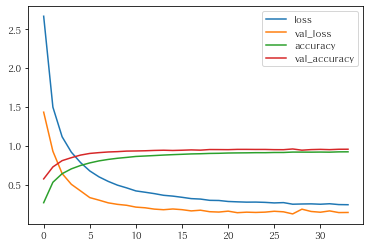

In [25]:
plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']
for each in plot_target:
    plt.plot(history.history[each], label=each)
    
plt.legend()
plt.show()


In [26]:

model.evaluate(X_test, y_test)

839/839 [==============================] - 21s 25ms/step - loss: 0.1504 - accuracy: 0.9570


[0.150443434715271, 0.9569804072380066]

In [27]:
from keras.models import load_model
model = load_model('model/traffic_model_2_4.h5')

In [28]:
y_test[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [29]:
import numpy as np

predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:10]

839/839 [==============================] - 21s 25ms/step


array([73, 29, 15, 48,  1, 47, 61, 10, 88,  6], dtype=int64)

In [31]:
y_labels = []
for vector in y_test:
    for idx, i in enumerate(vector):
        if i != 0:
            y_labels.append(idx)

In [45]:
y_labels = np.array(y_labels)
print(y_labels)

[73 29 37 ... 21 45 27]


In [33]:
wrong_result = []

for n in range(0, len(y_test)):
    if predicted_labels[n] != y_labels[n]:
        wrong_result.append(n)
        
len(wrong_result)

989

In [34]:
import random

samples = random.choices(population=wrong_result, k=4)

In [4]:
labels_to_str = [
    "+자형 교차로",
    "T자형 교차로",
    "Y자형 교차로",
    "ㅏ자형 교차로",
    "ㅓ자형 교차로",
    "우선 도로",
    "우합류 도로",
    "좌합류 도로",
    "회전형 교차로",
    "철길 건널목",
    "우로 굽은 도로",
    "좌로 굽은 도로",
    "우좌로 이중 굽은 도로",
    "좌우로 이중 굽은 도로",
    "오르막 경사",
    "내리막 경사",
    "도로 폭이 좁아짐",
    "우측 차로 없어짐",
    "좌측 차로 없어짐",
    "우측방 통행",
    "양측방 통행",
    "중앙 분리대 시작",
    "중앙 분리대 끝남",
    "신호기",
    "미끄러운 도로",
    "강변 도로",
    "노면 고르지 못함",
    "과속 방지턱",
    "낙석 도로",
    "횡단 보도(주의)",
    "어린이 보호(주의)",
    "자전거(주의)",
    "도로 공사중",
    "비행기",
    "횡풍",
    "터널",
    "야생 동물 보호",
    "위험",
    "상습 정체 구간",
    "2방향 통행",
    "교량",
    "통행 금지",
    "자동차 통행 금지",
    "화물차 통행 금지",
    "승합차 통행 금지",
    "이륜차 및 원동기장치자전거 통행 금지",
    "자동차, 이륜차 및 원동기장치자전거 통행 금지",
    "경운기, 트랙터 및 손수레 통행 금지",
    "자전거 통행 금지",
    "진입 금지",
    "직진 금지",
    "우회전 금지",
    "좌회전 금지",
    "유턴 금지",
    "앞지르기 금지",
    "주정차 금지",
    "주차 금지",
    "차 중량 제한",
    "차 높이 제한",
    "차 폭 제한",
    "차간 거리 확보",
    "최고 속도 제한",
    "최저 속도 제한",
    "서행",
    "일시 정지",
    "양보",
    "보행자 보행 금지",
    "위험물적재차량 통행 금지",
    "자동차 전용 도로",
    "자전거 전용 도로",
    "자전거 및 보행자 겸용 도로",
    "회전 교차로",
    "직진",
    "우회전",
    "좌회전",
    "직진 및 우회전",
    "직진 및 좌회전",
    "좌우회전",
    "유턴",
    "양측방 통행",
    "우측면 통행",
    "좌측면 통행",
    "진행 방향별 통행 구분",
    "우회로",
    "자전거 및 보행자 통행구분",
    "자전거 전용 차로",
    "주차장",
    "자전거 주차장",
    "보행자 전용 도로",
    "횡단 보도",
    "노인 보호",
    "어린이 보호",
    "자전거 횡단 도",
    "일방 통행(우)",
    "일방 통행(좌)",
    "일방 통행(직)",
    "비보호 좌회전",
    "자전거 나란히",
    "버스 전용 차로",
    "다인승 차량 전용 차로",
    "통행 우선",
    "좌회전 및 유턴",
    "장애인 보호"
]

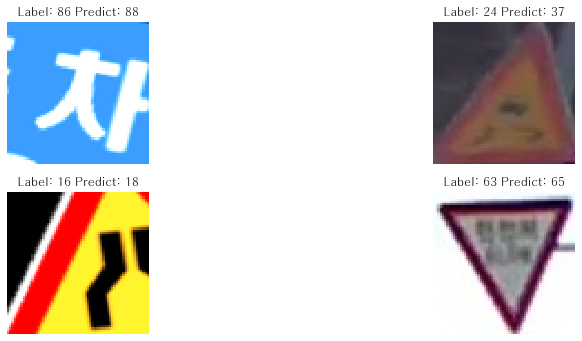

In [49]:
plt.figure(figsize = (14, 12))
for idx, n in enumerate(samples):
    plt.subplot(4, 2, idx+1)
    plt.imshow(X_test[n].reshape(64, 64, 3), cmap = 'Greys', interpolation = 'nearest')
    plt.title("Label: " + labels_to_str[int(categories[y_labels[n]])] + ' Predict: ' + labels_to_str[int(categories[predicted_labels[n]])])
    plt.axis('off')
    
plt.show()

In [5]:
from keras.models import load_model
model = load_model('model/traffic_model_2_4.h5')

In [7]:
from PIL import Image
import numpy as np

In [148]:
# 이미지 파일을 64 x 64 로 줄이고, 벡터화 시켜 X에 저장
image_w = 64
image_h = 64
X = []
img = Image.open('1_20201125_131531_001860_002.jpg')
img = img.convert("RGB")
img_resized = img.resize((image_w, image_h))
data = np.asarray(img_resized)
X.append(data)
X = np.array(X)
X = X.astype(float) / 255


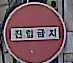

In [149]:
img

In [150]:
result = model.predict(X)
labels_to_str[int(categories[np.argmax(result, axis=1)[0]])]

1/1 [==============================] - 0s 18ms/step


'진입 금지'